Kornpob Bhirombhakdi

kbhirombhakdi@stsci.edu

# Description
This notebook demonstrates how to use hstgrism version 8.0.0 (pip install hstgrism) mapping trace and wavelength using [HST/aXe](https://www.stsci.edu/scientific-community/software/axe) definition.

We use grism (rootname: iab901ekq, G102) and direct (rootname: iab901ejq, F105W) images, which can be downloaded from [MAST](https://archive.stsci.edu/). Our object in this demo is GD153, which locates at about pixel (351,545) in the direct image. We note that the aXe configuration file is for G102/F105W pair, and we are interested beam A.

# Quick Walkthrough
- In the next cell, we import modules, and specify information.
- Step 1: creating a container class, which will help saving and organizing output files.
- Step 2: computing trace and wavelength by (2.1) computing xyref, and then (2.2) instantiating HST/WFC3/IR/G102 object and computing trace and wavelength.
- Output files are accessible in the savefolder.
- Last, we plot and save using show_overview.


In [1]:
from hstgrism.container import Container
from hstgrism.confreader import ConfReader
from hstgrism.computesip import ComputeSIP
from hstgrism.computetracenwavelength import ComputeTraceNWavelength
from hstgrism.computexyref import ComputeXYREF
from hstgrism.wfc3irg102 import WFC3IRG102
from hstgrism.show_overview import show_overview

saveprefix = 'testprefix'
savefolder = 'testfolder'
plotformat = 'pdf'
overwrite = True
xyd = (351.32706,545.13459)
confile = '/Users/kbhirombhakdi/_work/_calib_files/WFC3.IR.G102.cal.V4.32/G102.F105W.V4.32.conf'
beam = 'A'
gfile = ('/Users/kbhirombhakdi/_work/_data/11552/G102_set/mastDownload/HST/iab901ekq/iab901ekq_flt.fits',1)
dfile = ('/Users/kbhirombhakdi/_work/_data/11552/G102_set/mastDownload/HST/iab901ejq/iab901ejq_flt.fits',1) # file and extension
xyref = None


# Step 1: Container


In [2]:
container_params = {'saveprefix':saveprefix,
                    'savefolder':savefolder,
                    'plotformat':plotformat,
                    'overwrite':overwrite
                   }
containerobj = Container(**container_params)


# Step 2: Map trace and wavelength
Ingredients to map trace and wavelength include:
- confile
- beam
- xyref = xyd + xydiff + xyoff

where
- xyd = (pixX,pixY) from associated direct image of the source
- xydiff = (dx,dy) for the relative position shift between direct and grism images. For HST images, this can be computed as xydiff = f(POSTARG1_d,POSTARG2_d,SCALE_d,POSTARG1_g,POSTARG2_g,SCALE_g) = (POSTARG1_g,POSTARG2_g) / SCALE_g - (POSTARG1_d,POSTARG2_d) / SCALE_d for *_d and *_g for values of direct and grism images, respectively
- xyoff = (x,y) = h(confile,beam) or user specifies (Note: xyoff can be used as an manual adjustment)

We complete this process in two steps:
- 2.1: ComputeXYREF
- 2.2: Instantiate grism object, and compute trace and wavelength

Note: during these steps, other classes would be called including:
- hstgrism.confread.ConfReader
- hstgrism.computesip.ComputeSIP
- hstgrism.computetracenwavelength.ComputeTraceNWavelength

Note: Use Polynomial2D class (pip install polynomial2d)


## Step 2.1: ComputeXYREF


In [3]:
xyref_params = {'xyd':xyd,
                'xydiff':'default',
                'xyoff':'default',
                'confile':confile,
                'beam':beam,
                'gfile':gfile,
                'dfile':dfile,
                'container':containerobj
               }
xyrefobj = ComputeXYREF(**xyref_params)
xyrefobj.compute()
xyrefobj.save()


Save ./testfolder/testprefix_xyref.csv


## Step 2.2: Instantiate grism object, and compute trace and wavelength

In [4]:
xyref = xyrefobj.data['xyref']
grism_params = {'confile':confile,
                'beam':beam,
                'xyref':xyref,
                'container':containerobj
               }
grismobj = WFC3IRG102(**grism_params)
grismobj.compute()
grismobj.save()


Rescale = False
Perform compute
Rescale = False
Perform compute
Rescale = False
Perform compute
Rescale = False
Perform compute
Save ./testfolder/testprefix_trace.csv


# show_overview

Save ./testfolder/testprefix_overview.pdf



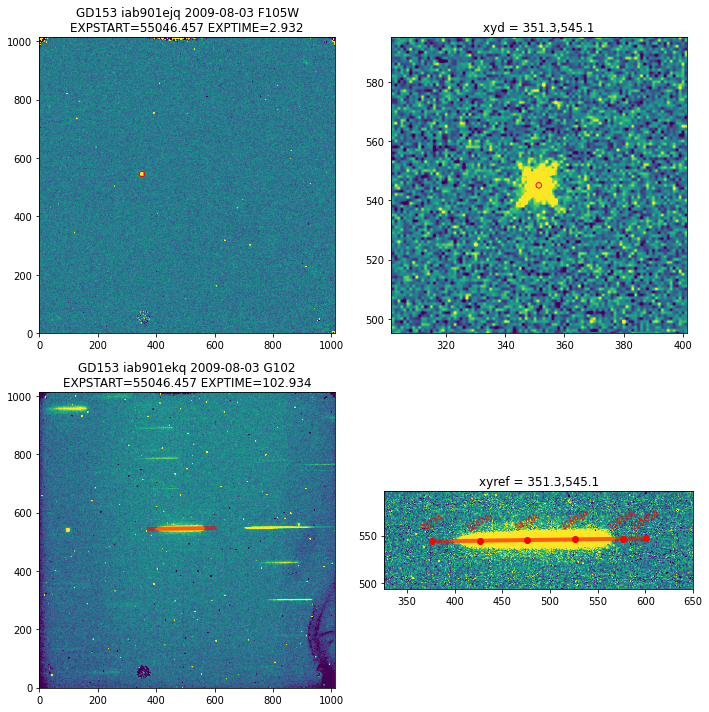

In [5]:
show_overview(gfile,dfile,xyd,xyref,grismobj.output['xh'],grismobj.output['yh'],grismobj.output['ww'],
              objname='GD153',
              save=True,
              container=containerobj,
             )
